## Evolution of a system of coupled scalar waves in 1D

Consider the following system:

$$\partial_t  \phi = \mu,$$

$$\partial_t \mu = c^{2}_{\phi} . \nabla^{2} \phi,$$

$$ \partial_t \zeta = \nu - \gamma(\zeta - \phi),$$

$$\partial_t \nu = c^{2}_{\zeta} . \nabla^{2} \zeta. $$

where, $\gamma$ is the scalar coupling factor/stiffness parameter.

In one dimension these equations reduce to:

$$\dfrac{d\phi}{dt} = \mu,$$

$$\dfrac{d\mu}{dt} = c^{2}_{\phi} \dfrac{d^2\phi}{dx^2},$$

$$\dfrac{d\zeta}{dt} = \nu - \gamma(\zeta - \phi),$$

$$\dfrac{d\nu}{dt} = c^{2}_{\zeta} \dfrac{d^2\zeta}{dx^2}.$$


With initial conditions:

$$ \phi(x,t) = \phi(x,0) = \exp \left(-\frac{1}{2} . \left( \dfrac{\sin(x)}{\sigma}\right)^2 \right) $$ 

$$ \dfrac{d \phi}{dt} (x,0) = \mu(x,0) = 0 $$

$$ \zeta(x,t) = \zeta(x,0) = \exp \left(-\frac{1}{2} . \left( \dfrac{\sin(x)}{\sigma}\right)^2 \right) $$

$$ \dfrac{d \zeta}{dt} (x,0) = \nu(x,0) = 0 $$

and boundary conditions:

$$ \phi(x,t) = \phi(x + L,t), 0 \leq x \leq 2 $$
$$ \zeta(x,t) = \zeta(x + L,t), 0 \leq x \leq 2 $$

### IMEX Midpoint method - (s,$\sigma$,p) = (1,2,2)

The explicit midpoint method butcher table is(with $s$ stages):

| $\hat{c}$ | $\hat{a}$          |         |
|-----------|--------------------|----------|
| $0_1$     | $0_{11}$           | $0_{12}$ |
| $1/2_2$     | $1/2_{21}$ | $0_{22}$ |
| $\hat{b}$  | $0_1$              | $1_2$    |


and the implicit midpoint method butcher table is:

| 1/2 | 1/2 |
| - | - |
|     | 1 |

which on padding results in the following (with $\sigma = s+1$ stages):

| $c$ | $a$          |         |
|-----------|--------------------|----------|
| $0_0$     | $0_{00}$           | $0_{01}$ |
| $1/2_1$     | $0_{10}$ | $0_{11}$ |
| $b$  | $0_0$              | $1_1$    |

Set $\hat{k_1} = f(u_0)$

For $i = 1,2...s$,

$K_i = g(u_i) \Rightarrow K_1 = g(u_1)$ since $s=1$.

where,

$$u_i = u_0 + h \sum_{j=1}^{i} a_{i,j} K_j + h \sum_{j=1}^{i} \hat{a_{i,j}} \hat{K_j} $$

$$\Rightarrow u_1 = u_0 + h(a_{11}K_1 + \hat{a_{21}} \hat{K_1})$$
$$\Rightarrow u_1 = u_0 + \frac{h}{2}(K_1 + \hat{K_1})$$

$$\boxed {\Rightarrow u_1 = u_0 + h(g(u_1) + f(u_0)}$$

Evaluate $\hat{K_{i+1}} = f(u_i)$,
$$K_2 = f(u_1)$$

Finally,

$$u_{n+1} = u_0 + h \sum_{j=1}^{s} b_j K_j + h \sum_{j=1}^{\sigma} \hat{b_j} \hat{K_j}$$

For $s=1, \sigma = 2$,
$$\Rightarrow u_{n+1} = u_0 + h(b_1 K_1) + h(\hat{b_1} \hat{K_1} + \hat{b_2} \hat{K_2})$$
$$\Rightarrow u_{n+1} = u_0 + h(K_1 + \hat{K_2}) $$

$$\boxed {\Rightarrow u_{n+1} = u_0 + h(g(u_1) + f(u_1))} $$

$$u_{n+1} = u_0 + h(g(u_1) + f(u_1)) $$

Now Define:
$$G(u_1): u_1 -\alpha g(u_1) - \beta_m = 0$$

Here,
$$\alpha = \frac{h}{2}$$

$$\beta_m = u_0 + \frac{h}{2}f(u_0)$$
$m =1,2,3... \rightarrow$ denotes state vector.

User is required to solve function $G(u_1)$ for state vector $u_1$ analytically. 

$g(u_1)$ can also be computed from the relation : $g(u_1) = \dfrac{u_1 - \beta_m}{\alpha}$.


### IMEX ARS(3,4,3) method - (s,$\sigma$,p) = (3,4,3)

The explicit Butcher tableau is(with $s$ stages):

| $\hat{c}$                       | $\hat{a}$   |          |           |           |
|-----------                      |-------------|----------|-----------|-----------|
| $0_1$                           | $0_{11}$    | $0_{12}$ | $0_{13}$  | $0_{14}$  |
| $\Gamma_2$                      | $\Gamma_{21}$     | $0_{22}$ | $0_{23}$  | $0_{24}$  |
| $\frac{1+\Gamma}{2}_3$          | $\left( \frac{1+\Gamma}{2} - \eta\right)_{31}$    | $\eta_{32}$ | $0_{33}$  | $0_{34}$  |
| $1_4$                           | $(1-2\mu)_{41}$    | $\mu_{42}$ | $\mu_{43}$  | $0_{44}$  |
| $\hat{b}$                       | $0_{1}$    | $(1-\delta-\Gamma)_{2}$ | $\delta_{3}$  | $\Gamma_{4}$  |


And the implicit Butcher tableau which on padding results in the following ($\sigma = s+1$ stages):

| $c$ | $a$   |          |           |           |
|-----------|-------------|----------|-----------|-----------|
| $0_0$     | $0_{00}$    | $0_{01}$ | $0_{02}$  | $0_{03}$  |
| $\Gamma_1$     | $0_{10}$    | $\Gamma_{11}$ | $0_{12}$  | $0_{13}$  |
| $\frac{1+\Gamma}{2}_2$     | $0_{20}$    | $\frac{1+\Gamma}{2}_{21}$ | $\Gamma_{22}$  | $0_{23}$  |
| $1_3$     | $0_{30}$    | $(1-\delta-\Gamma)_{31}$ | $\delta_{32}$  | $\Gamma_{33}$  |
| $b$     | $0_{0}$    | $(1-\delta-\Gamma)_{1}$ | $\delta_{2}$  | $\Gamma_{3}$  |

where $\Gamma = 0.4358665215$, $\delta = -0.644373171$, $\eta = 0.3966543747$, $\mu = 0.5529291479$.

<br/><br/>

For $i = 1,2,...s$, 

$K_{i} = g(u_i)$ and  $\hat{K_{i+1}} = f(u_i)$,

where,

$$u_i = u_0 + h \sum_{j=1}^{i} a_{i,j} K_j + h \sum_{j=1}^{i} \hat{a_{i,j}} \hat{K_j} $$

$$ u_1 = u_0 + h \left( a_{11}g(u_1) + \hat{a_{21}}f(u_0) \right),$$ 
$$ u_2 = u_0 + h \left( a_{21}g(u_1) + a_{22}g(u_2) + \hat{a_{31}}f(u_0) + \hat{a_{32}}f(u_1) \right),$$ 
$$ u_3 = u_0 + h \left( a_{31}g(u_1) + a_{32}g(u_2) + a_{33}g(u_3) + \hat{a_{41}}f(u_0) + \hat{a_{42}}f(u_1) + \hat{a_{43}}f(u_2) \right). $$
 
Define:

$$ \beta_{1,m} = u_0 + h(\hat{a_{21}}f(u_0)), \ \alpha_1 = a_{11}h ,$$
$$ \beta_{2,m} = u_0 + h(a_{21}g(u_1) + \hat{a_{31}}f(u_0) + \hat{a_{32}}f(u_1)), \ \alpha_2 = a_{22}h ,$$
$$ \beta_{3,m} = u_0 + h(a_{31}g(u_1) + a_{32}g(u_2) + \hat{a_{41}}f(u_0) + \hat{a_{42}}f(u_1) + \hat{a_{43}}f(u_2) ), \ \alpha_3 = a_{33}h .$$

Hence,

$$ \boxed{ G(u_i) : u_i - \beta_{i,m} -\alpha_i g(u_i) = 0}$$


$i = 1,2,3$ and $m =1,2,3... \rightarrow$ denotes state vector.
User is required to solve the function $G(u)$ for state vector $u$ analytically.

Finally,

$$u_{n+1} = u_0 + h \sum_{j=1}^{s} b_j K_j +  h \sum_{j=1}^{\sigma} \hat{b_j} \hat{K_j}$$

For $s=3, \sigma = 4$,

$$\boxed {\Rightarrow u_{n+1} = u_0 + h(b_1 g(u_1) + b_2 g(u_2) + b_3 g(u_3) +
\hat{b_1}f(u_0) + \hat{b_2}f(u_1) + \hat{b_3}f(u_2) + \hat{b_4}f(u_3)). } $$

where $g(u_1) = \dfrac{u_1 - \beta_{1,m}}{\alpha_1},\ g(u_2) = \dfrac{u_2 - \beta_{2,m}}{\alpha_2},\ g(u_3) = \dfrac{u_3 - \beta_{3,m}}{\alpha_3}$.






Split coupled scalar wave equation into stiff - $g(u)$ and non-stiff - $f(u)$ parts:

| Non-stiff RHS : $f(u)$                       | Stiff RHS : $g(u)$ |
|-----------|--------------------|
| $\partial_t  \phi = \mu$                    | $\partial_t  \phi = 0$ |
| $\partial_t \mu = c^{2}_{\phi} . \nabla^{2} \phi$   | $\partial_t \mu = 0 $ |
| $ \partial_t \zeta = \nu $    | $ \partial_t \zeta = - \gamma(\zeta - \phi)$ |
| $\partial_t \nu = c^{2}_{\zeta} . \nabla^{2} \zeta$ | $\partial_t \nu = 0$ |

$$ \boxed{ G(u_i) : u_i - \beta_{i,m} -\alpha_i g(u_i) = 0}$$

Solving for $u_i$:

$$ u_i = \beta_{i,m} + \alpha_i g(u_i) $$

For coupled scalar wave system:

$$\phi_i = \beta_{i,\phi} + \alpha_i \times 0 $$
$$\mu_i = \beta_{i,\mu} + \alpha_i \times 0 $$
$$\nu_i = \beta_{i,\mu} + \alpha_i \times 0 $$
$$\zeta_i = \beta_{i,\zeta} + \alpha_i [-\gamma (\zeta_i - \phi_i) ]$$
Solving for $\zeta_i$,
$$\zeta_i = \beta_{i,\zeta} + \left( \dfrac{\alpha_i \gamma \phi_i}{(1 + \alpha_i \gamma)} \right)$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def compute_dt(cf,dx,c):
    dt = (cf*dx)/c
    return dt

##----------------------------Second order finite difference method--------------------------------##
def second_derivative_CFD2(var,dx):
    D2_var = np.zeros(len(var))
    var_with_ghosts = exterior_points_CFD2(var)
    for i in range (1,len(var_with_ghosts)-1): # calculates only interior
        # Central finite difference method:
        D2_var[i-1] = (var_with_ghosts[i-1] - 2*var_with_ghosts[i] + var_with_ghosts[i+1])/dx**2
    return D2_var

def exterior_points_CFD2(var):
    var_left_ghost = np.append(var[len(var)-1],var)
    var_ghosts = np.append(var_left_ghost,var[0])
    return var_ghosts

##----------------------------Fourth order finite difference method--------------------------------##
#Ref: https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf
def second_derivative_CFD4(var,dx):
    D2_var = np.zeros(Nx)
    var_with_ghosts = exterior_points_CFD4(var)
    for i in range (2,len(var_with_ghosts)-2):
        # Central finite difference method:
        D2_var[i-2] = (-var_with_ghosts[i+2] + 16*var_with_ghosts[i+1] - 30*var_with_ghosts[i]
                       + 16*var_with_ghosts[i-1] - var_with_ghosts[i-2]  )/(12*dx**2)
    return D2_var

def exterior_points_CFD4(var):
    var_l1_ghost = np.append(var[len(var)-1],var)
    var_l2_ghost = np.append(var[len(var)-2],var_l1_ghost)
    var_r1_ghost = np.append(var_l2_ghost,var[0])
    var_r2_ghost = np.append(var_r1_ghost,var[1])
    var_ghosts = var_r2_ghost
    return var_ghosts

In [3]:
##------------Explicit Time integrators------------------------------##

def RK2(rhs,u_n,dt):
    k1 = np.array(rhs(u_n))
    k2 = np.array(rhs(u_n + (dt/2)*k1))
    u_np1 = u_n + dt*k2
    return u_np1

def RK4(rhs,u_n,dt):
    k1 = np.array(rhs(u_n))
    k2 = np.array(rhs(u_n + (dt/2)*k1))
    k3 = np.array(rhs(u_n + (dt/2)*k2))
    k4 = np.array(rhs(u_n + dt*k3))
    u_np1 = u_n + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return u_np1


##--------------------IMEX(1,2,2) Method-----------------------------##

def IMEX_midpoint_122(f,G,u0,dt):
    k1_hat = np.array(f(u0))
    alpha = dt/2
    beta = u0 + alpha*k1_hat
    u1 = np.array(G(alpha,beta))
    k2_hat = np.array(f(u1))
    k1 = np.array( (u1-beta)/alpha )
    u_np1 = u0 + dt*k2_hat + dt*k1
    return u_np1

##--------------------IMEX(3,4,3) Method------------------------------##

# Define Butcher table elements
#------------------------------------------------------------#

Gamma = 0.4358665215
delta = -0.644373171
eta = 0.3966543747
mu = 0.5529291479

def implicit_butcher_table_a(i,j):
    a_imp = np.array([[0,0,0,0],
                  [0,Gamma,0,0],
                  [0,(1 - Gamma)/2,Gamma,0],
                  [0,(1-Gamma-delta),delta,Gamma]])
    return a_imp[i,j]
def explicit_butcher_table_a_hat(i,j):
    i,j = (i-1),(j-1)
    a_exp = np.array([[0,0,0,0],
                  [Gamma,0,0,0],
                  [((1 + Gamma)/2) - eta,eta,0,0],
                  [(1-2*mu),mu,mu,0]])
    return a_exp[i,j]

def implicit_b(i):
    b = np.array([0,(1-Gamma-delta),delta,Gamma])
    return b[i]

def explicit_b(i):
    i = i - 1
    b = np.array([0,(1-Gamma-delta),delta,Gamma])
    return b[i]

#------------------------------------------------------------#


def IMEX_343(f,G,a,a_hat,b,b_hat,u0,h):
    # alpha = dt*a_imp(1,1) = dt*a_imp(2,2) = dt*a_imp(3,3) = dt*Gamma
    alpha = h*Gamma
    #--------------Stage 1----------------#
    k1_hat = np.array(f(u0))
    beta_1 = u0 + h*a_hat(2,1)*k1_hat
    u1 = np.array(G(alpha,beta_1)) 
    #--------------Stage 2----------------#
    k1 = np.array( (u1-beta_1)/alpha ) #g(u_1)
    k2_hat = np.array(f(u1))
    beta_2 = u0 + h*( a(2,1)*k1 + a_hat(3,1)*k1_hat + a_hat(3,2)*k2_hat )
    u2 = np.array(G(alpha,beta_2))
    #--------------Stage 3----------------#
    k2 = np.array( (u2-beta_2)/alpha ) #g(u_2)
    k3_hat = np.array(f(u2))
    beta_3 = u0 + h*( a(3,1)*k1 + a(3,2)*k2 + a_hat(4,1)*k1_hat 
                     + a_hat(4,2)*k2_hat + a_hat(4,3)*k3_hat )
    u3 = np.array(G(alpha,beta_3))
    #-------------------------------------#
    k3 = np.array( (u3-beta_3)/alpha ) #g(u_3)
    k4_hat = np.array(f(u3))
    u_np1 = u0 + h*( b(1)*k1 + b(2)*k2 + b(3)*k3 +
                   b_hat(1)*k1_hat + b_hat(2)*k2_hat + b_hat(3)*k3_hat + b_hat(4)*k4_hat )
    return u_np1

##------------------------------------------------------------------------##

In [23]:
def numerical_method_flags(time_integration_method,finite_difference_method):
    global FD_method,TI_method, RHS_func
    if (finite_difference_method == "CFD2"):
        FD_method = second_derivative_CFD2
    if (finite_difference_method == "CFD4"):
        FD_method = second_derivative_CFD4
    if (time_integration_method == "RK2"):
        TI_method = RK2
        RHS_func = lambda u_n,FD_method,dx: (scalar_wave_RHS_f(u_n,FD_method,dx) + scalar_wave_RHS_g(u_n,FD_method,dx))
    if (time_integration_method == "RK4"):
        TI_method = RK4
        RHS_func = lambda u_n,FD_method,dx: (scalar_wave_RHS_f(u_n,FD_method,dx) + scalar_wave_RHS_g(u_n,FD_method,dx))
    if (time_integration_method == "IMEX-midpoint(1,2,2)"):
        TI_method = lambda rhs,u_n,dt: IMEX_midpoint_122(rhs,IMEX_G,u_n,dt)
        RHS_func = lambda u_n,FD_method,dx: scalar_wave_RHS_f(u_n,FD_method,dx)
    if (time_integration_method == "IMEX-ARS(3,4,3)"):
        TI_method = lambda rhs,u_n,dt: IMEX_343(rhs,IMEX_G,implicit_butcher_table_a,
                                                explicit_butcher_table_a_hat,implicit_b,explicit_b,
                                               u_n,dt)
        RHS_func = lambda u_n,FD_method,dx: scalar_wave_RHS_f(u_n,FD_method,dx)

In [24]:
def Evolve(init,rhs,time_integration_method,Nt,dt):
    global comp_time
    u_0 = init()
    u_result = np.zeros((Nt,len(u_0),Nx)) #u_result[i][j][k]; i -> time, j-> variable, k-> x position
    print("Total iteration = %d"%(Nt-1))
    start_time = time.time()
    u_result[0] = np.array((u_0))
    for i in range (1,Nt):
        u_np1 = np.array(time_integration_method(rhs,u_0,dt))
        #store result of iteration
        u_result[i] = u_np1
        #update values
        u_0 = u_np1
    end_time = time.time()
    comp_time = end_time - start_time
    print("Computation time: %f seconds"%(comp_time))
    return u_result

In [25]:
#RHS expressions

#Note: Split the RHS terms into two parts.
#      Non-stiff terms are defined in "scalar_wave_RHS_f" rountine and
#      stiff terms are defined in "scalar_wave_RHS_g" routine.


# Index data:     phi = u_n[0],mu = u_n[1],zeta = u_n[2],nu = u_n[3]
def scalar_wave_RHS_f(u_n,second_derivative,dx):
    phi = u_n[0]
    mu = u_n[1]
    zeta = u_n[2]
    nu = u_n[3]
    phi_dot = mu
    del_square_phi = second_derivative(phi,dx)
    del_square_zeta = second_derivative(zeta,dx)
    mu_dot = (wave_speed_phi**2)*del_square_phi
    zeta_dot = nu
    nu_dot = (wave_speed_zeta**2)*del_square_zeta 
    u_rhs_f = np.array((phi_dot,mu_dot,zeta_dot,nu_dot))
    return u_rhs_f

# This routine is not required if Implicitly solved function G(u_i) is used
def scalar_wave_RHS_g(u_n,second_derivative,dx):
    phi = u_n[0]
    mu = u_n[1]
    zeta = u_n[2]
    nu = u_n[3]
    phi_dot = np.zeros(Nx) # if var=0, use np.zeros(Nx)
    zeta_dot = - stiffness*(zeta - phi)
    mu_dot = np.zeros(Nx)
    nu_dot = np.zeros(Nx)
    u_rhs_g = np.array((phi_dot,mu_dot,zeta_dot,nu_dot))
    return u_rhs_g

##------------------IMEX----------------------------##
# Solve the system of equations defined by G(u_1) analytically using
# Mathematica or sympy and define them in the routine "IMEX_G".
def IMEX_G(alpha,beta):
    phi_1 = beta[0]
    mu_1 = beta[1]
    zeta_1 = (beta[2] + alpha*stiffness*phi_1)/(1 + alpha*stiffness)
    nu_1 = beta[3]
    u1 = np.array((phi_1,mu_1,zeta_1,nu_1))
    return u1
##------------------IMEX----------------------------##

In [26]:
# Index data:     phi = u_n[0],mu = u_n[1],zeta = u_n[2],nu = u_n[3]
def initial_conditions(expr_phi,expr_zeta,expr_mu,expr_nu,var_x,dx):
    var_phi = expr_phi(var_x)
    var_mu = expr_mu(var_x)
    var_zeta = expr_zeta(var_x)
    var_nu = expr_nu(var_x)
    return np.array([var_phi,var_mu,var_zeta,var_nu])

# Initial condition for phi,zeta at t=0
width = 0.5
expr_phi = lambda x: np.exp(-0.5 * (np.sin(2*np.pi*1*x) / width )**2)
expr_zeta = lambda x: np.exp(-0.5 * (np.sin(2*np.pi*1*x) / width )**2)
#Initial condition for d/dt(phi) = mu,d/dt(zeta) = nu at t=0
expr_mu = lambda x: 0*x
expr_nu = lambda x: 0*x

#Physics
x_start = 0
x_length = 2.0
t_start = 0.0
t_end = 2.0
wave_speed_phi = 1.0
wave_speed_zeta = 2.0
stiffness = 50.0

In [27]:
#Specify available time integration method:
#- Explicit: 'RK2' or 'RK4',
#- Implicit-Explicit: 'IMEX-midpoint(1,2,2)' or 'IMEX-ARS(3,4,3)'

# Specify available Finite Difference method: 
#- Central Finite Difference: 'CFD2' or 'CFD4'

time_integration_method = "IMEX-ARS(3,4,3)" 
finite_difference_method = "CFD4" 
numerical_method_flags(time_integration_method,finite_difference_method)

#CFL condition: dt < alpha*dx/c
Courant_factor = 0.4
Nx = 80


In [28]:

dx = (x_start + x_length)/Nx
var_x_4h = np.arange(x_start,x_start + x_length,dx) #End point not included for periodic system
dt_4h = compute_dt(Courant_factor,dx,wave_speed_phi) # wave speed of phi
var_t_4h = np.arange(t_start,t_end + dt_4h,dt_4h)
Nt_4h = len(var_t_4h)
print('Time step size = %.8f,\nSpatial resolution = %.4f'%(dt_4h,dx))

#-----------------Start Numerical Simulation-------------------------------------------#

u_Nsoln_4h = Evolve(lambda: initial_conditions(expr_phi,expr_zeta,expr_mu,expr_nu,var_x_4h,dx),
                  lambda u_n: RHS_func(u_n,FD_method,dx),TI_method,Nt_4h,dt_4h)


Time step size = 0.01000000,
Spatial resolution = 0.0250
Total iteration = 200
Computation time: 0.591341 seconds


In [29]:
dx = (x_start + x_length)/Nx
var_x_2h = np.arange(x_start,x_start + x_length,dx) #End point not included for periodic system
dt_2h = dt_4h/2 #compute_dt(Courant_factor,dx_2h,wave_speed_phi) # wave speed of phi
var_t_2h = np.arange(t_start,t_end+dt_2h,dt_2h)
Nt_2h = len(var_t_2h)
print('Time step size = %.8f,\nSpatial resolution = %.4f'%(dt_2h,dx))

#-----------------Start Numerical Simulation-------------------------------------------#

u_Nsoln_2h = Evolve(lambda: initial_conditions(expr_phi,expr_zeta,expr_mu,expr_nu,var_x_2h,dx),
                  lambda u_n: RHS_func(u_n,FD_method,dx),TI_method,Nt_2h,dt_2h)


Time step size = 0.00500000,
Spatial resolution = 0.0250
Total iteration = 400
Computation time: 1.020379 seconds


In [30]:
dx = (x_start + x_length)/Nx
var_x_1h = np.arange(x_start,x_start + x_length,dx) #End point not included for periodic system
dt_1h = dt_4h/4 #compute_dt(Courant_factor,dx_1h,wave_speed_phi) # wave speed of phi
var_t_1h = np.arange(t_start,t_end+dt_1h,dt_1h)
Nt_1h = len(var_t_1h)
print('Time step size = %.8f,\nSpatial resolution = %.5f'%(dt_1h,dx))

#-----------------Start Numerical Simulation-------------------------------------------#

u_Nsoln_1h = Evolve(lambda: initial_conditions(expr_phi,expr_zeta,expr_mu,expr_nu,var_x_1h,dx),
                  lambda u_n: RHS_func(u_n,FD_method,dx),TI_method,Nt_1h,dt_1h)


Time step size = 0.00250000,
Spatial resolution = 0.02500
Total iteration = 800
Computation time: 2.270808 seconds


In [31]:
#----------- End of numerical solution computation-----------------#

In [32]:
# Index data:     phi = u_n[0],mu = u_n[1],zeta = u_n[2],nu = u_n[3]
phi_4h = u_Nsoln_4h[:,0]
zeta_4h = u_Nsoln_4h[:,2]
phi_2h = u_Nsoln_2h[:,0]
zeta_2h = u_Nsoln_2h[:,2]
phi_1h = u_Nsoln_1h[:,0]
zeta_1h = u_Nsoln_1h[:,2]


0


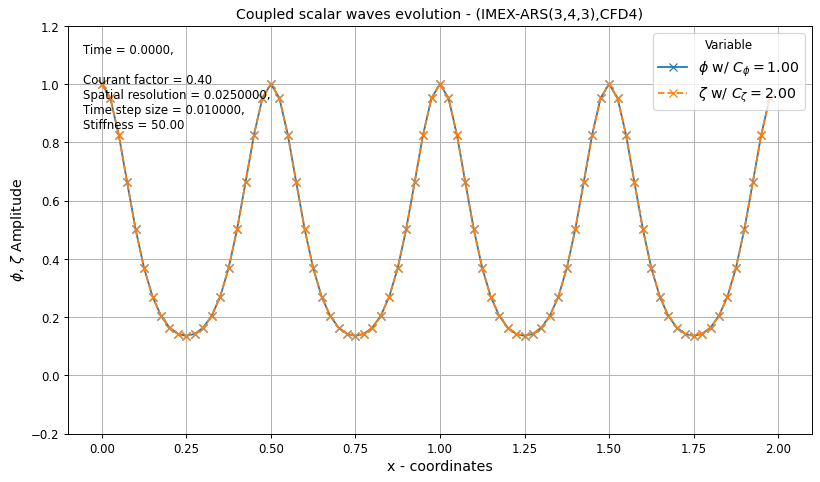

50


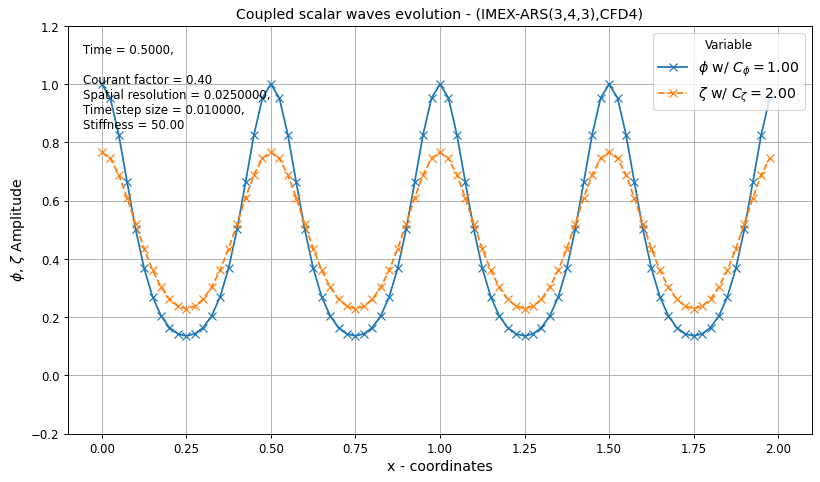

100


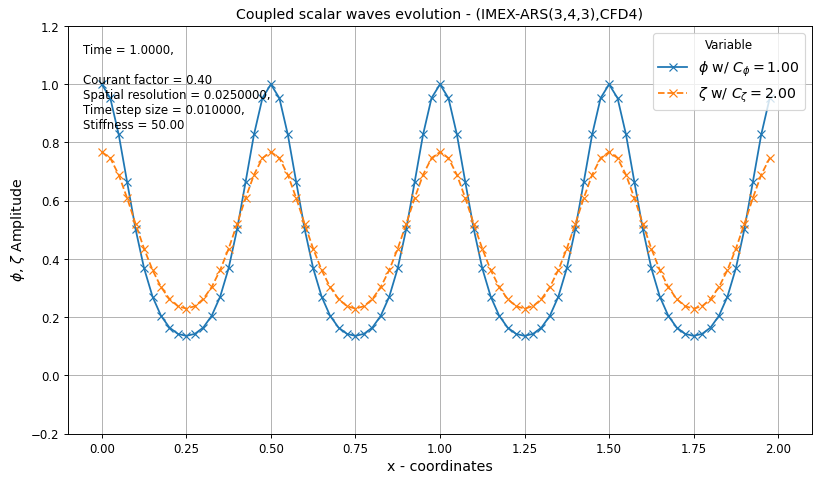

150


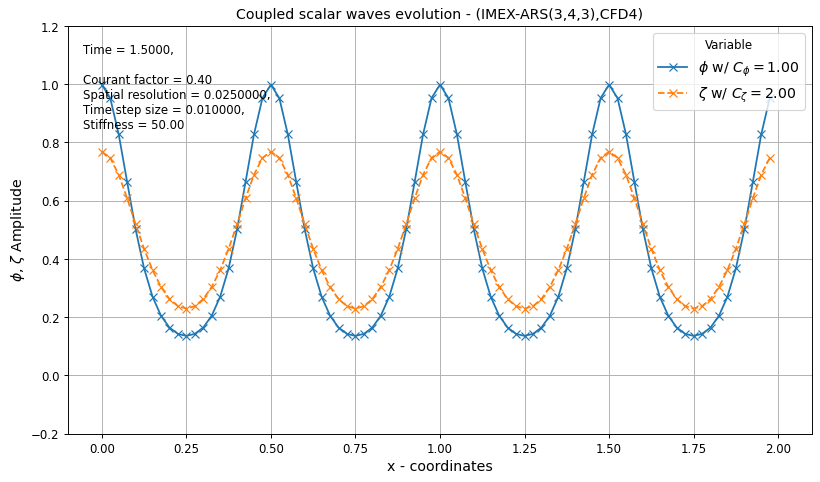

200


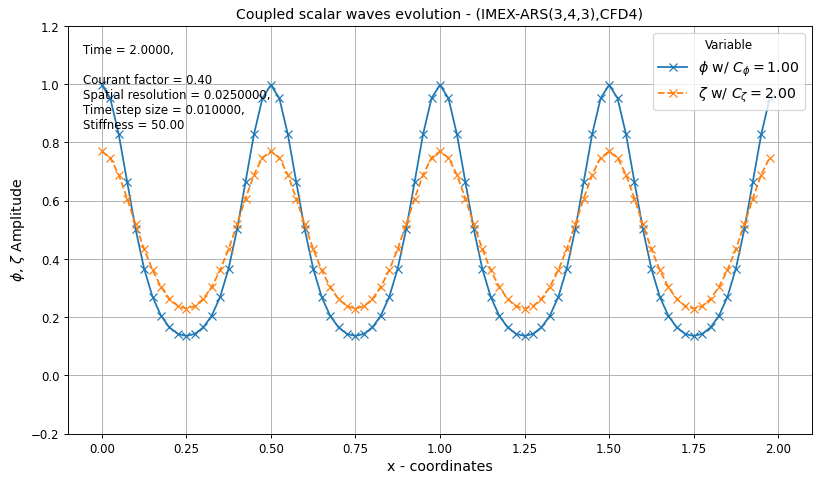

In [33]:

# Plot evolution of wave function
###-------------------------------------------------###
def plot_evolution(title,x_label,y_label,x_param,y_param1,y_param2,var_t,dx,dt,i):
    fig_dpi = 85
    fig, ax = plt.subplots(figsize=(960/fig_dpi,540/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    ax.axis([-0.1,2.1,-0.2,1.2])
    plt.plot(x_param,y_param1,'-x')
    plt.plot(x_param,y_param2,'--x')
    plt.grid(axis="both")
    plt.legend([r'$\phi$ w/ $C_{\phi}=%0.2f$'%wave_speed_phi,r'$\zeta$ w/ $C_{\zeta}=%0.2f$'%wave_speed_zeta],
               title="Variable",loc='upper right',fontsize=12)
    plt.text(0.02, 0.75,
             'Time = %.4f,\n\nCourant factor = %0.2f\nSpatial resolution = %.7f,\nTime step size = %.6f,\nStiffness = %.2f'
             %(var_t[i],Courant_factor,dx,dt,stiffness),transform=ax.transAxes)
    plt.show()

plots_to_generate = 4
for i in range (0,Nt_4h,int(Nt_4h/plots_to_generate)):
    print(i)
    plot_evolution('Coupled scalar waves evolution - (%s,%s)'%(time_integration_method,finite_difference_method),
                   "x - coordinates",r'$\phi$, $\zeta$ Amplitude',
                   var_x_4h,phi_4h[i,:],zeta_4h[i,:],var_t_4h,dx,dt_4h,i)

0.0 0.0 0.0


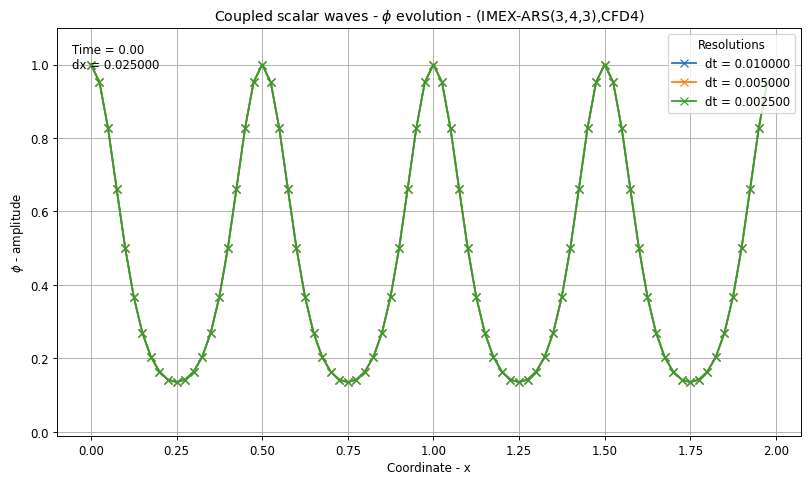

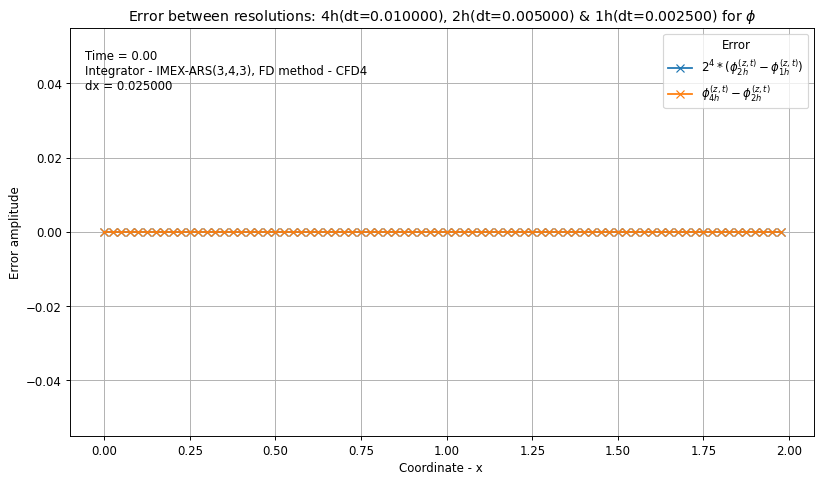

0.20000000000000004 0.20000000000000004 0.20000000000000004


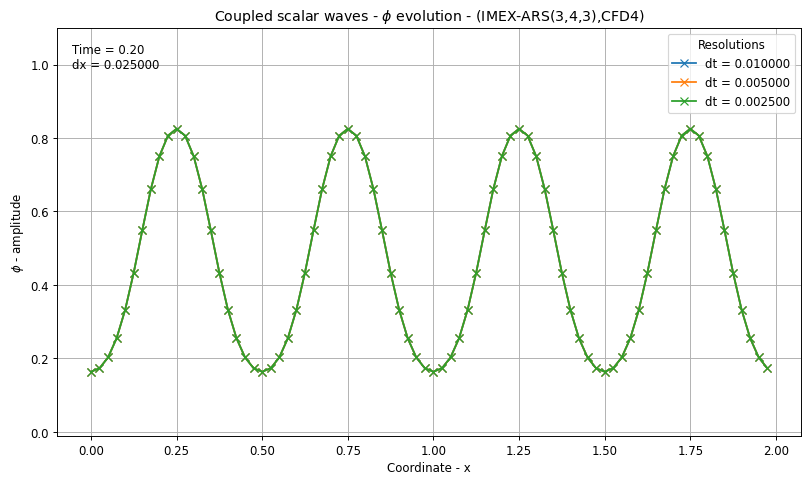

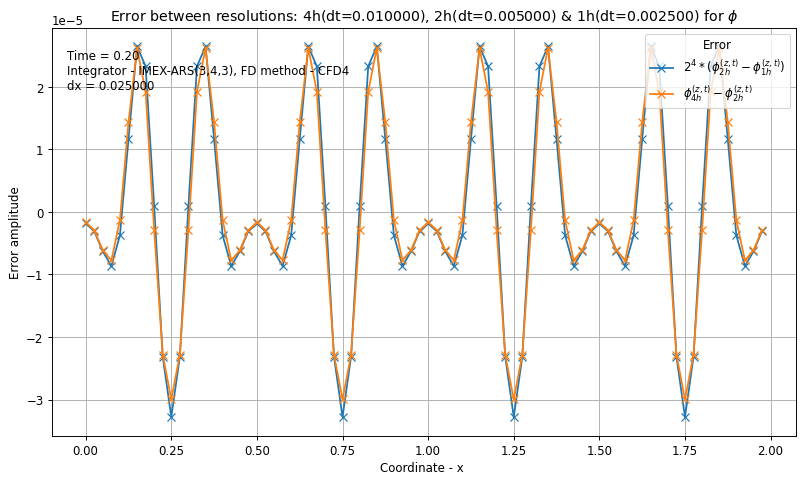

0.4000000000000001 0.4000000000000001 0.4000000000000001


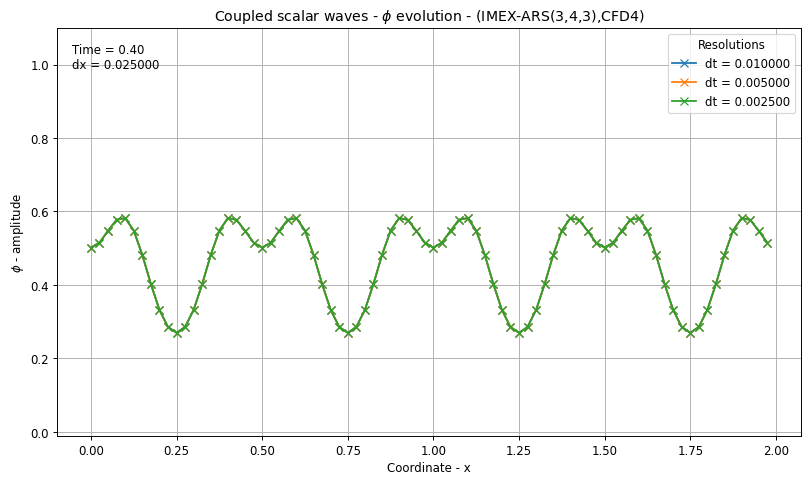

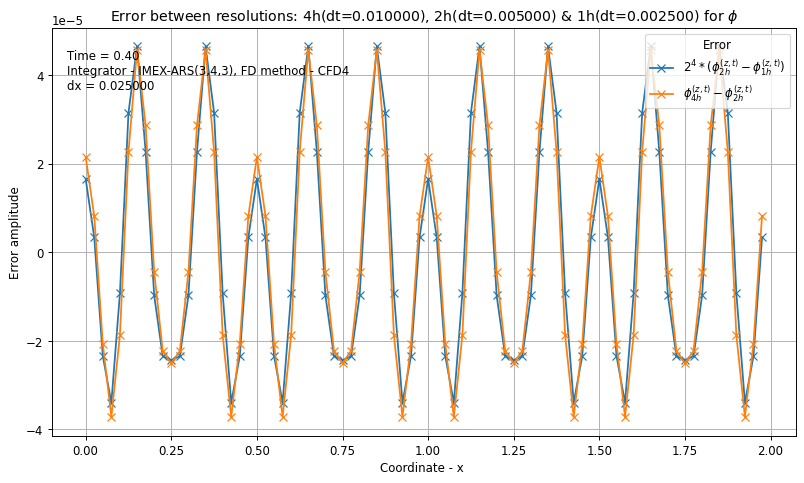

0.6000000000000001 0.6000000000000001 0.6000000000000001


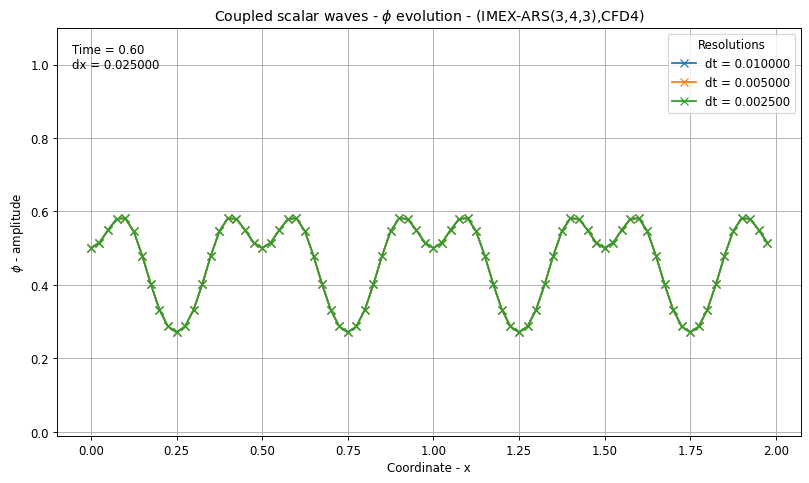

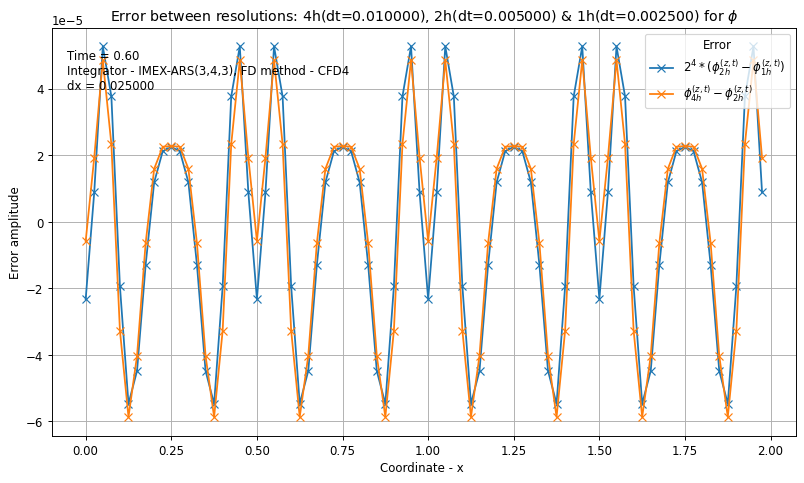

0.8000000000000002 0.8000000000000002 0.8000000000000002


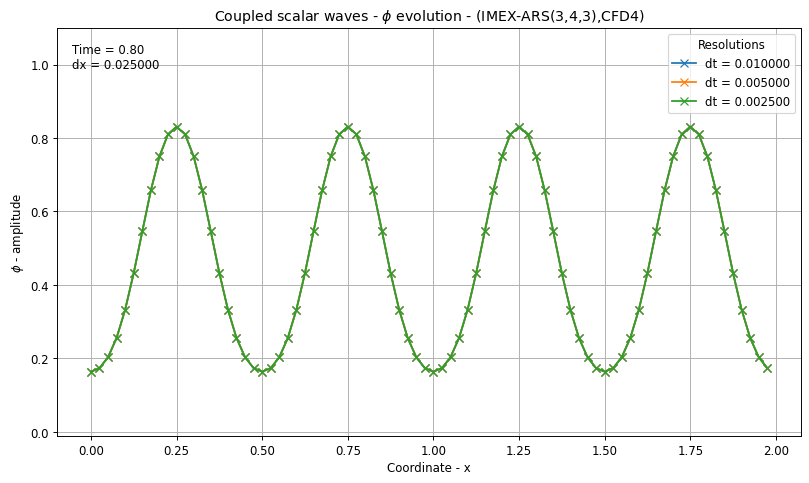

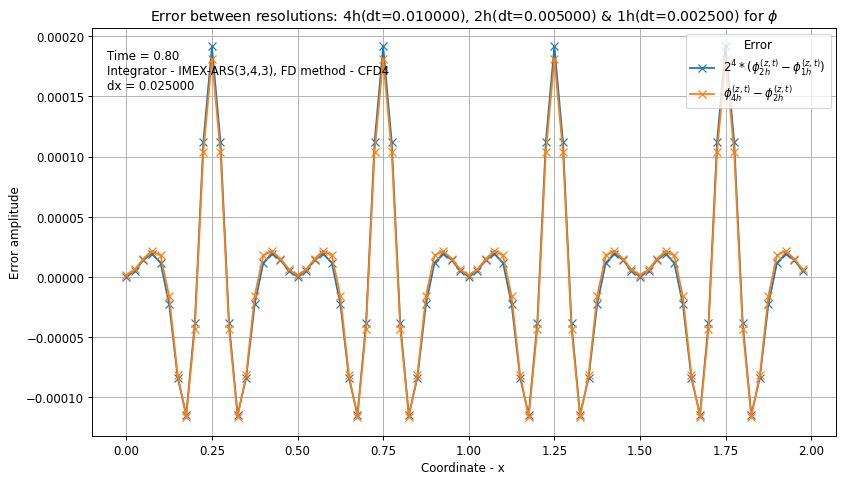

1.0000000000000002 1.0000000000000002 1.0000000000000002


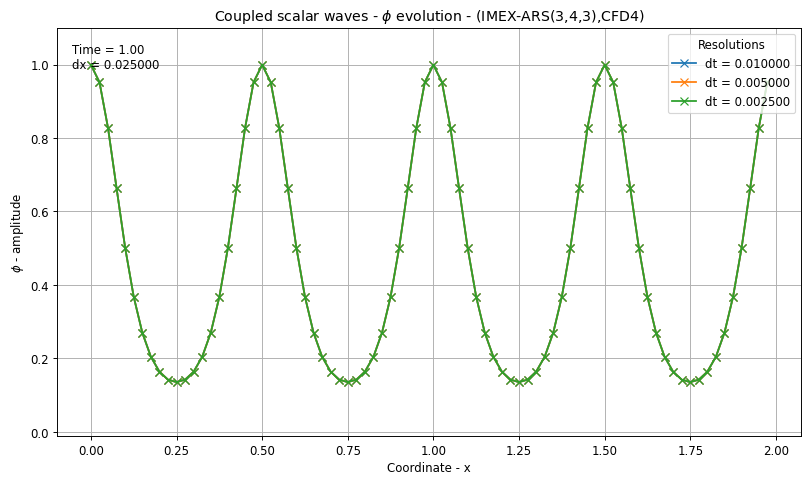

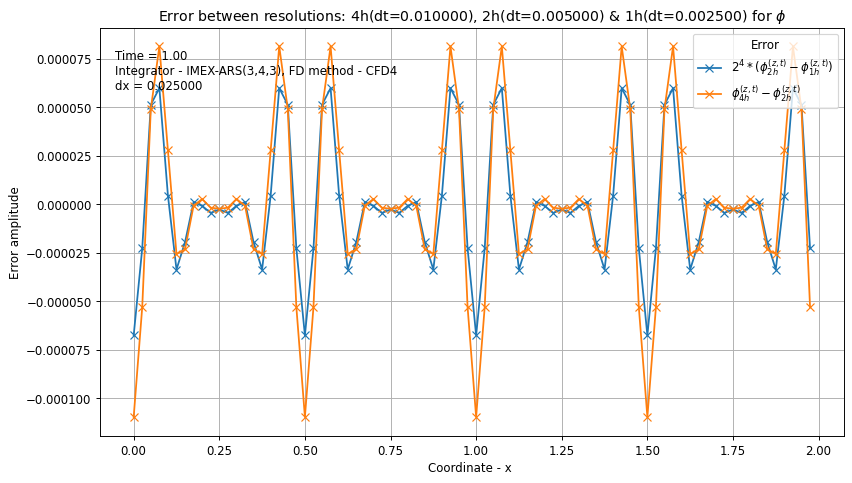

1.2000000000000002 1.2000000000000002 1.2000000000000002


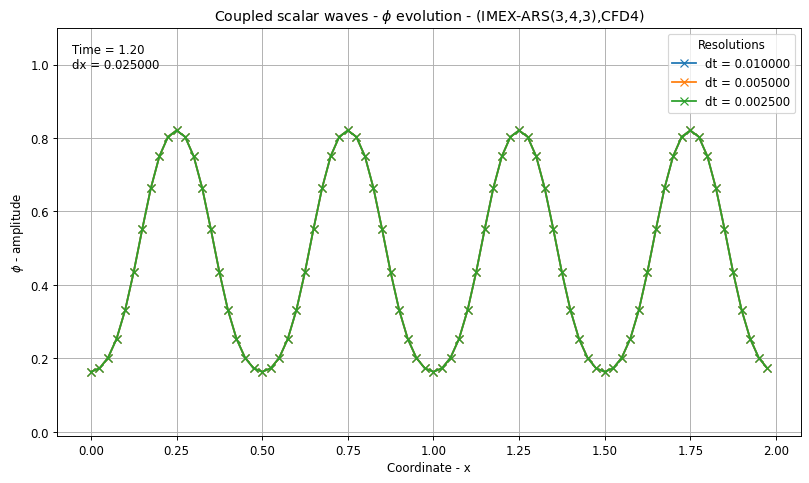

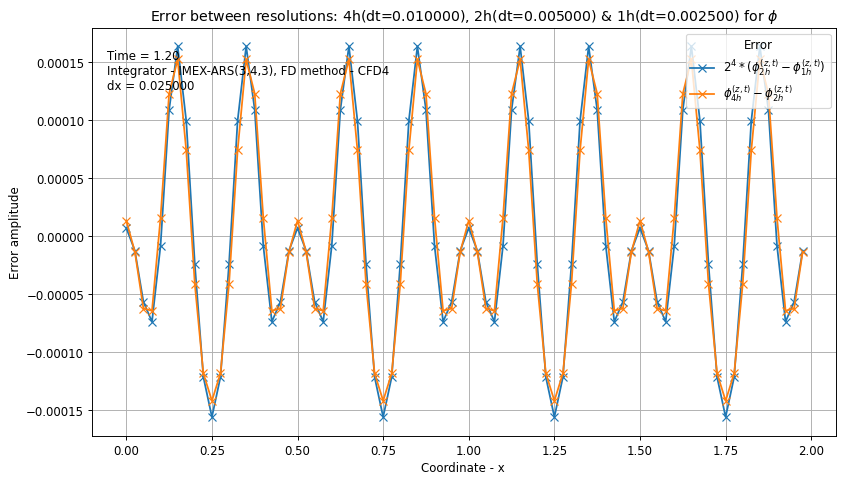

1.4000000000000004 1.4000000000000004 1.4000000000000004


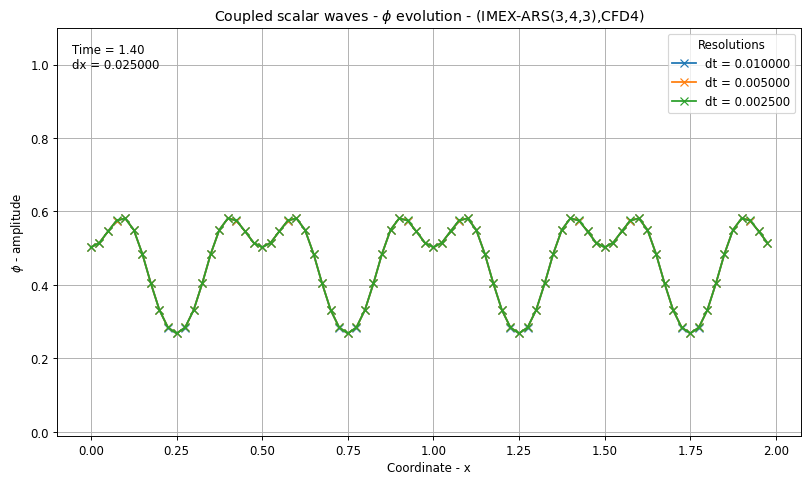

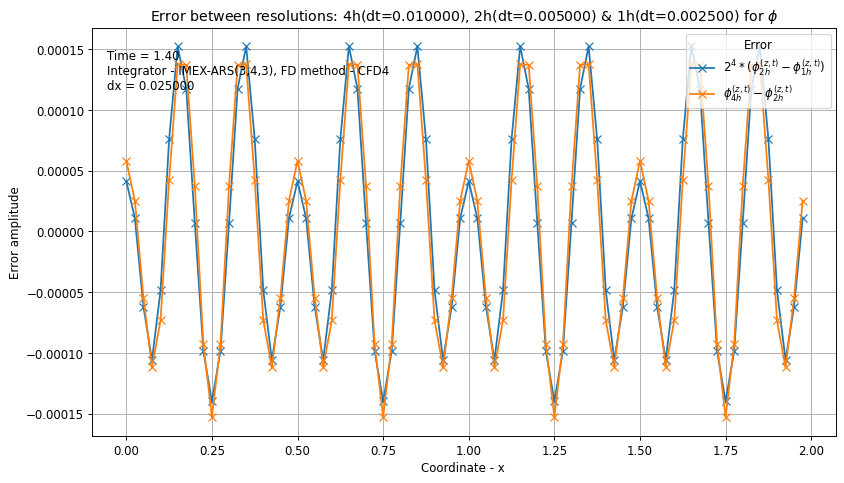

1.6000000000000003 1.6000000000000003 1.6000000000000003


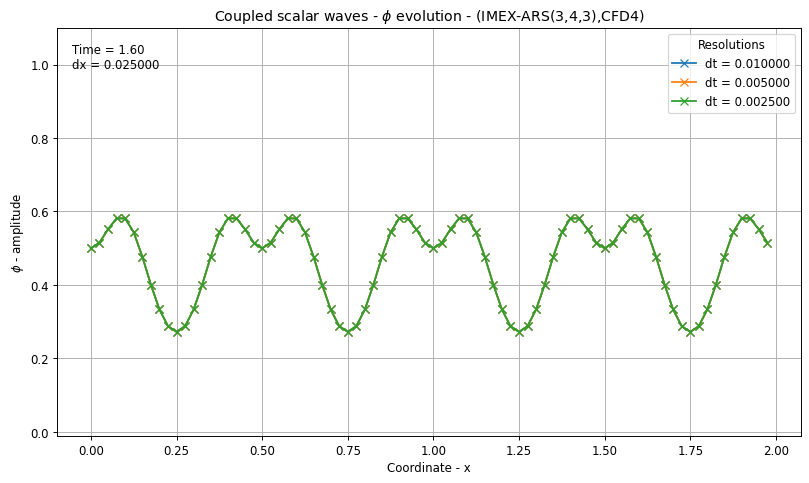

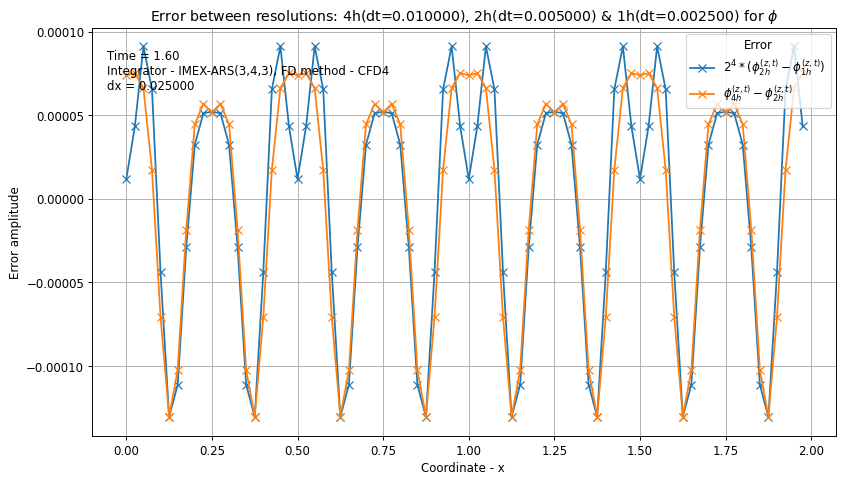

1.8000000000000003 1.8000000000000003 1.8000000000000003


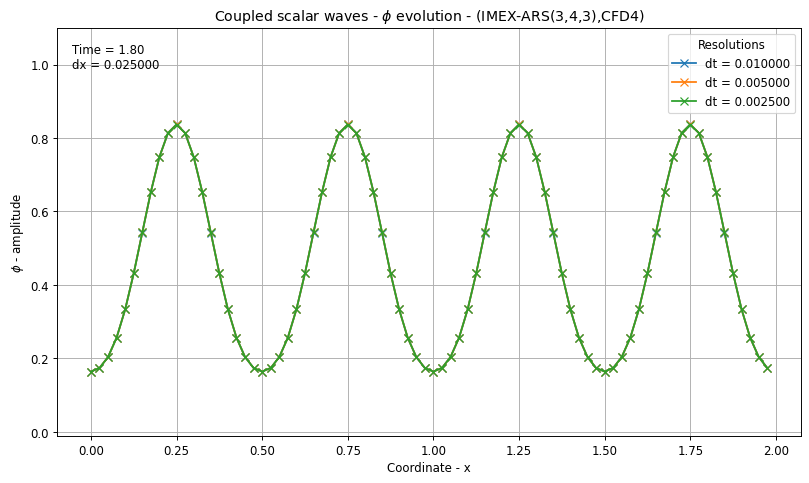

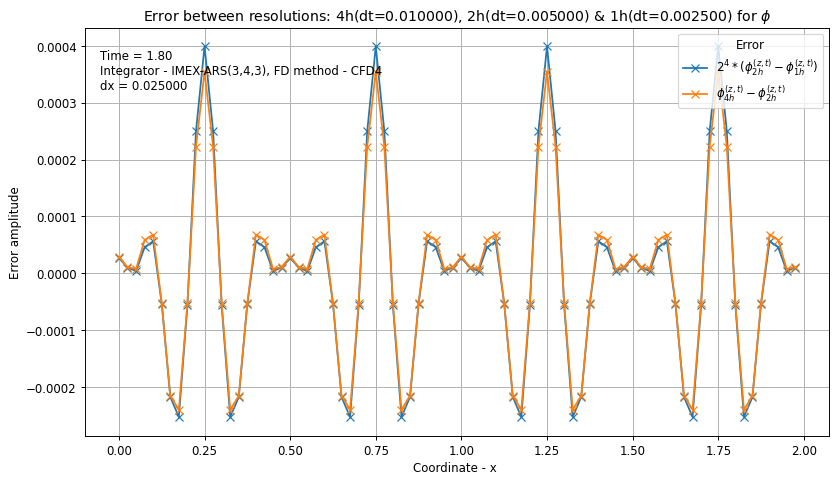

2.0000000000000004 2.0000000000000004 2.0000000000000004


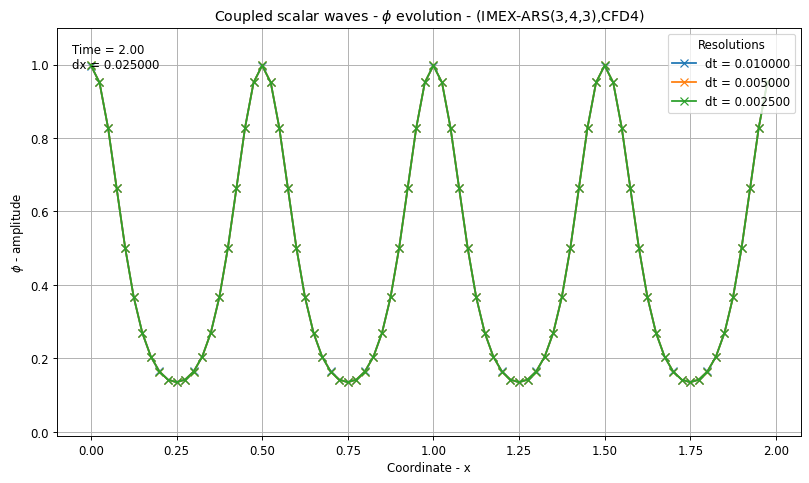

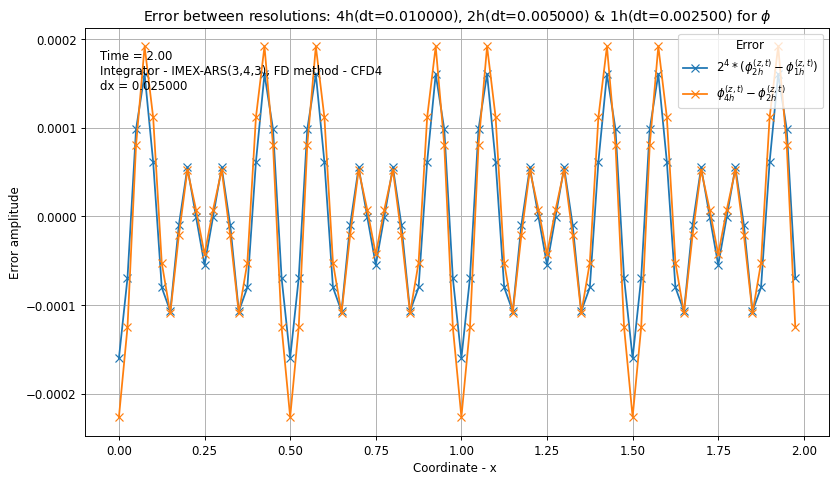

0.0 0.0 0.0


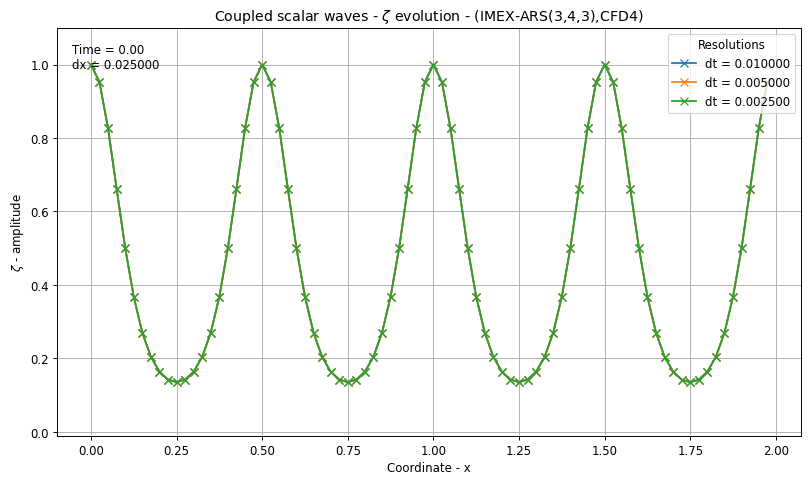

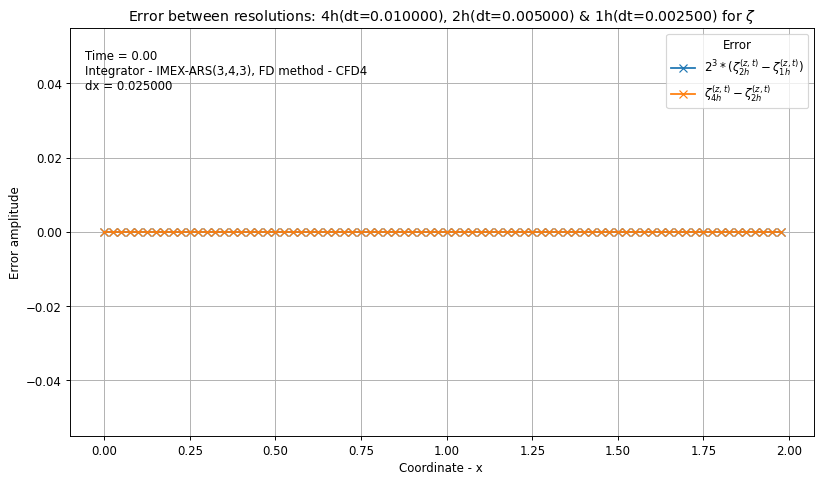

0.20000000000000004 0.20000000000000004 0.20000000000000004


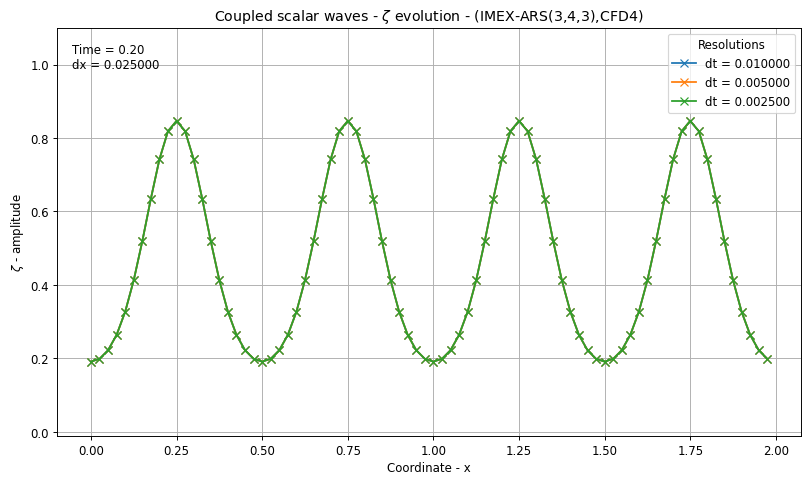

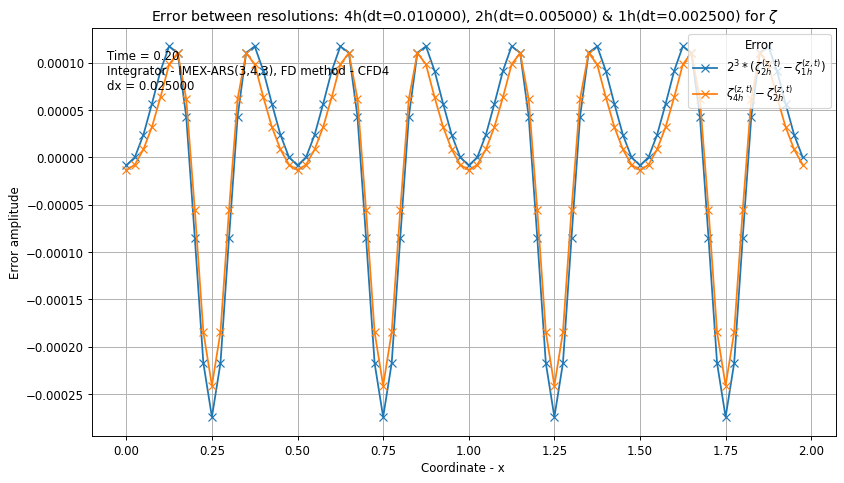

0.4000000000000001 0.4000000000000001 0.4000000000000001


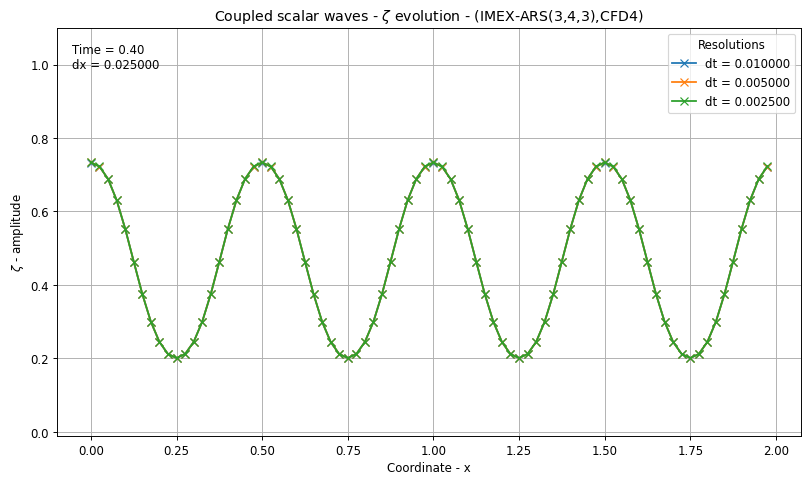

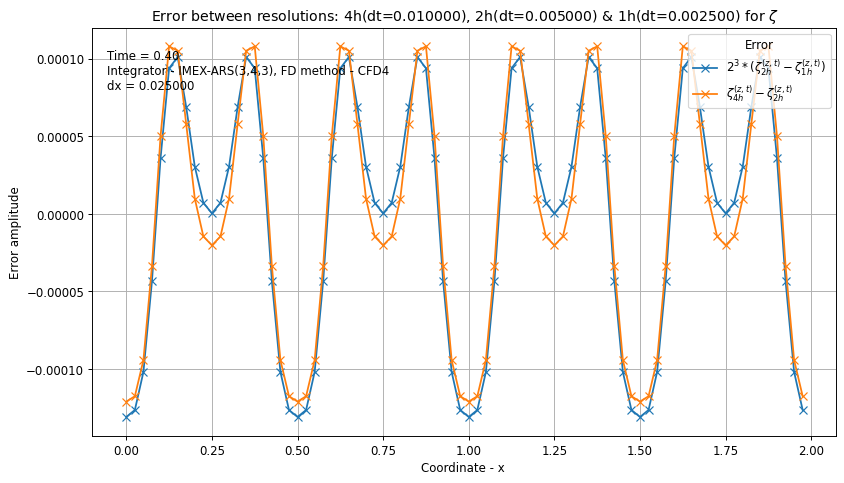

0.6000000000000001 0.6000000000000001 0.6000000000000001


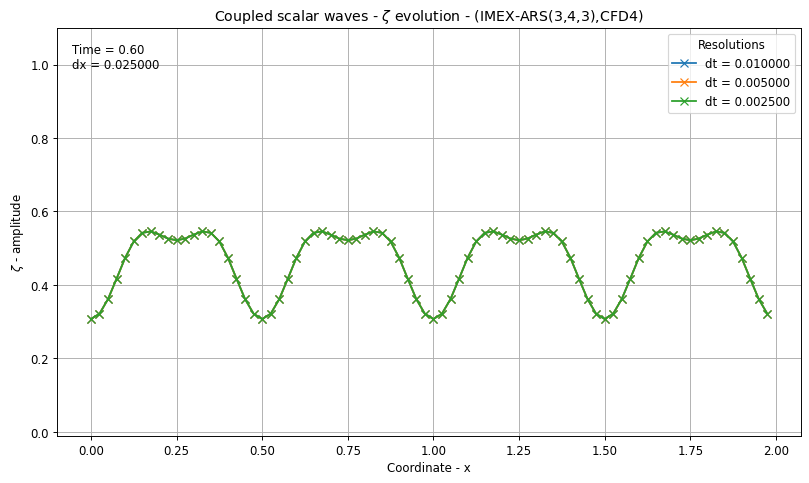

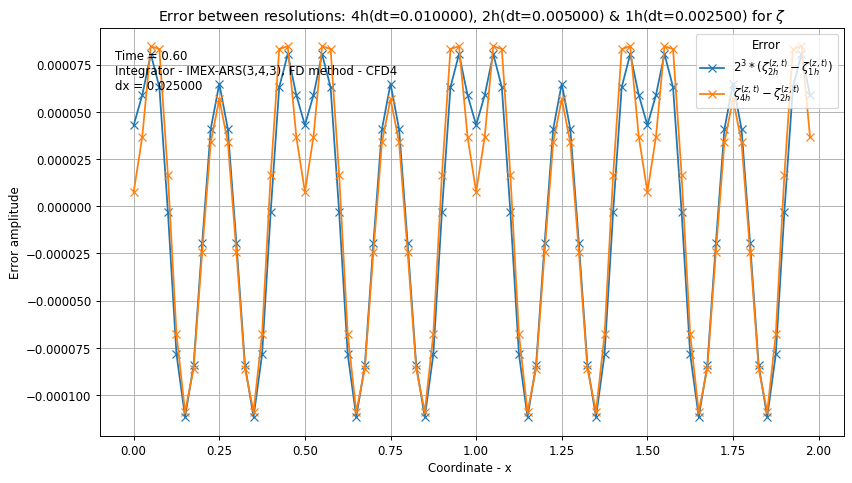

0.8000000000000002 0.8000000000000002 0.8000000000000002


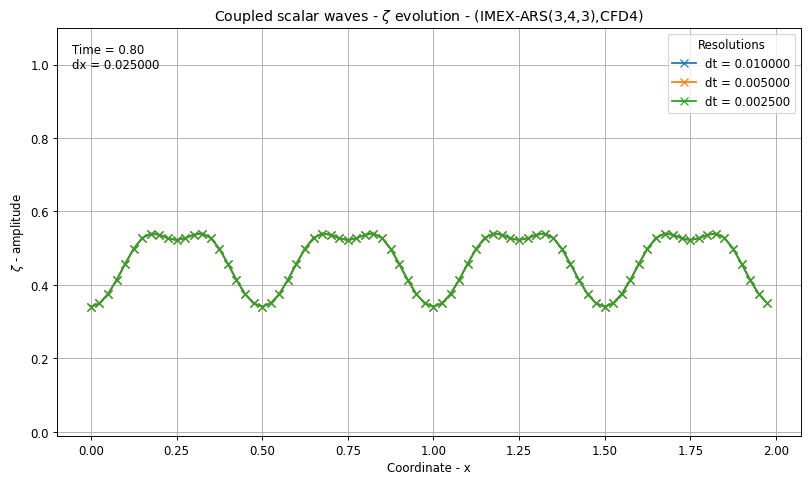

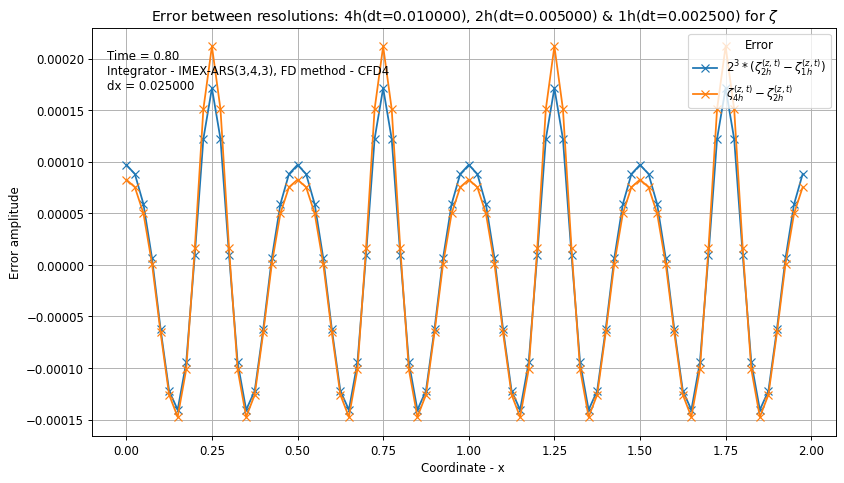

1.0000000000000002 1.0000000000000002 1.0000000000000002


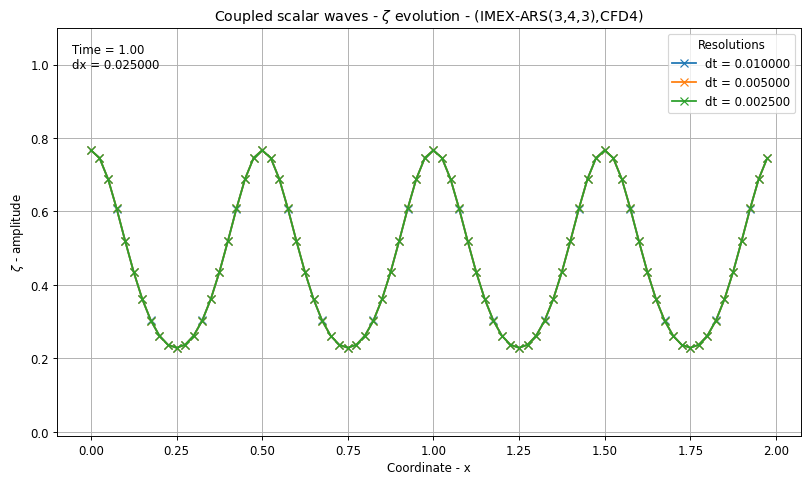

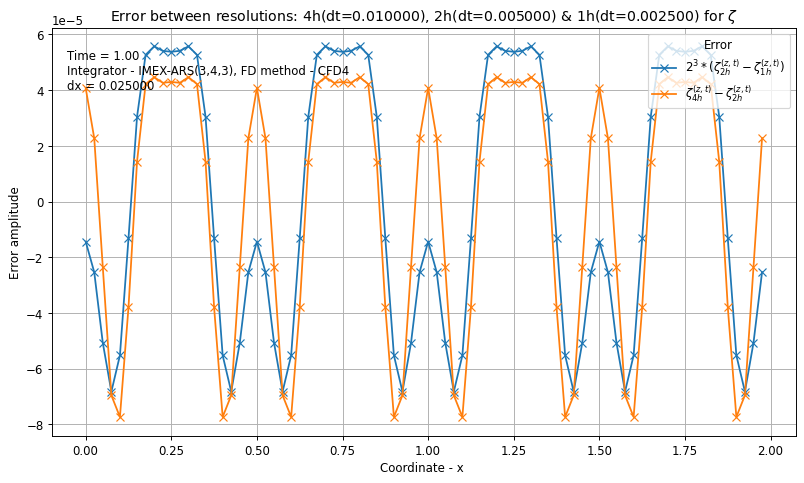

1.2000000000000002 1.2000000000000002 1.2000000000000002


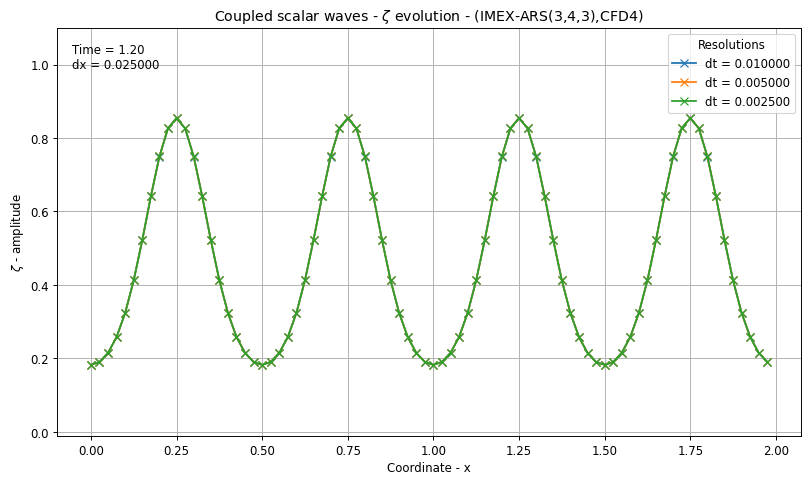

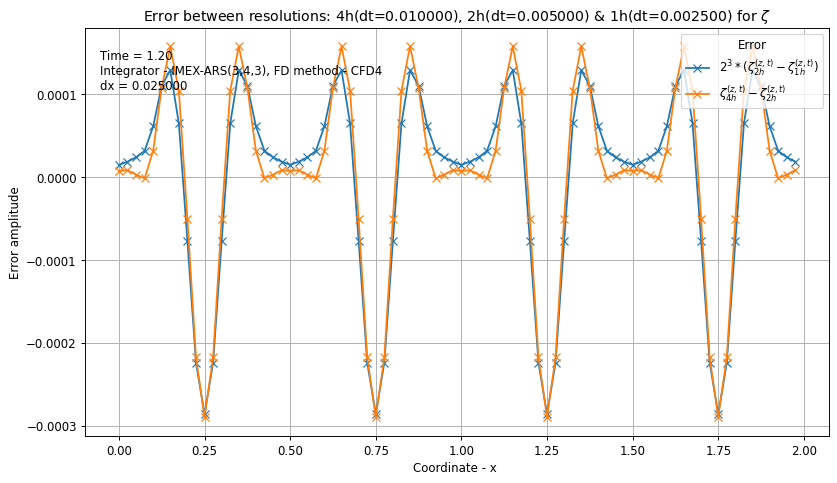

1.4000000000000004 1.4000000000000004 1.4000000000000004


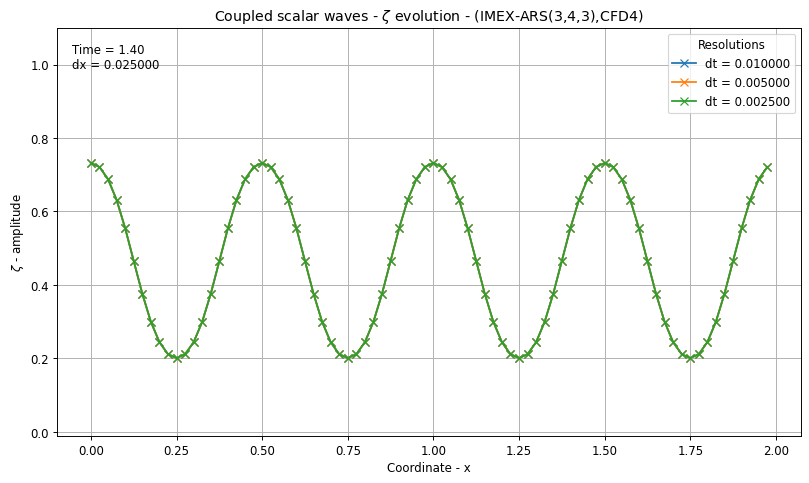

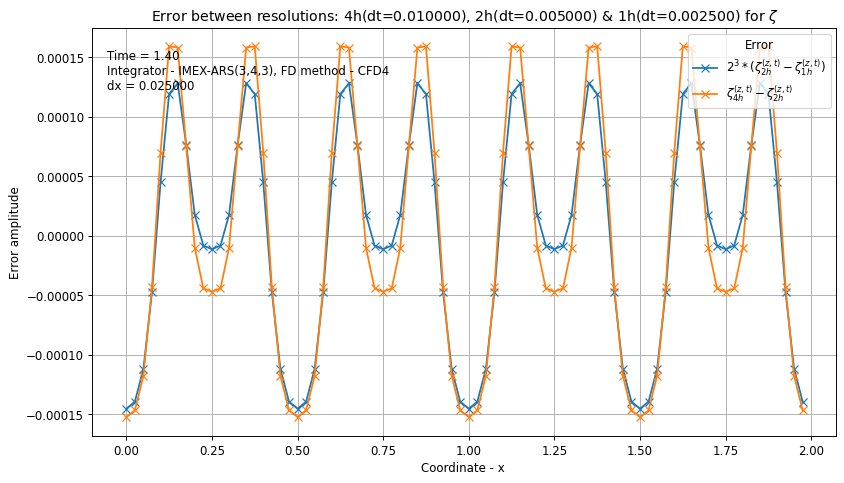

1.6000000000000003 1.6000000000000003 1.6000000000000003


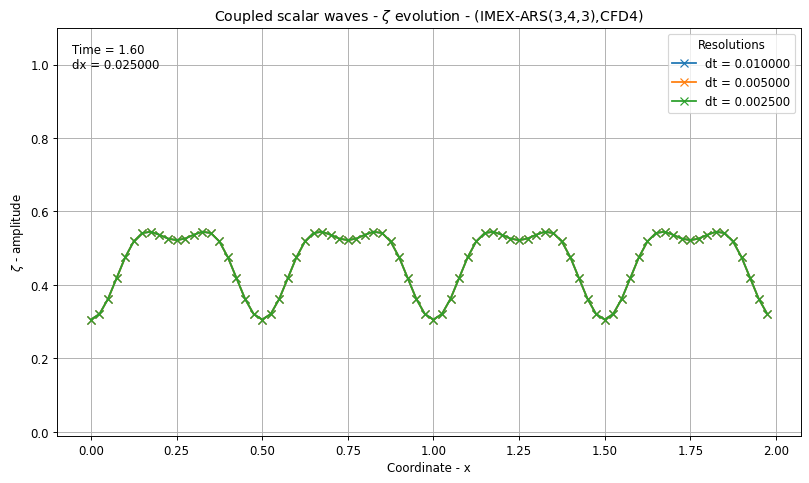

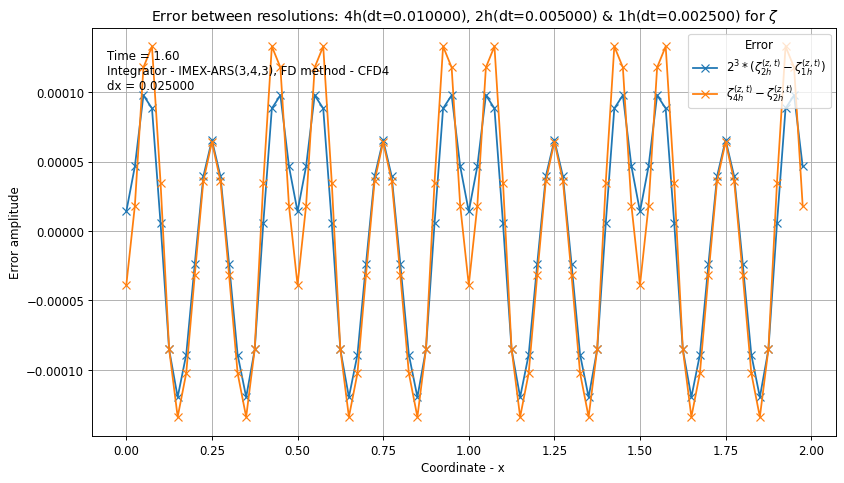

1.8000000000000003 1.8000000000000003 1.8000000000000003


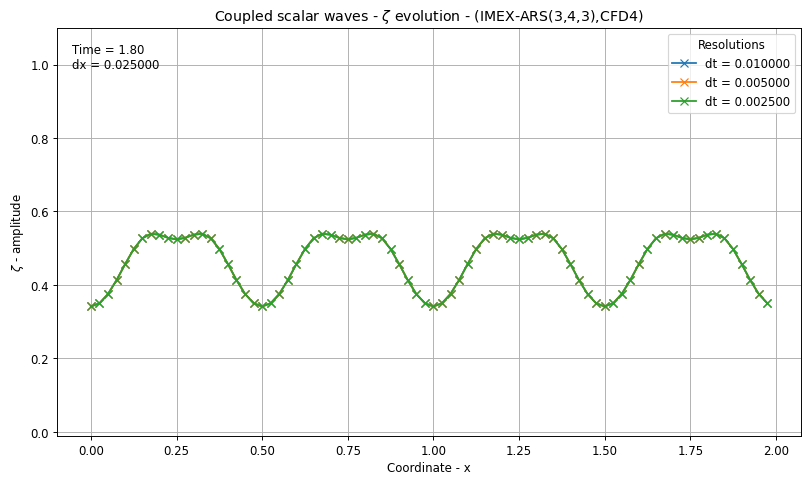

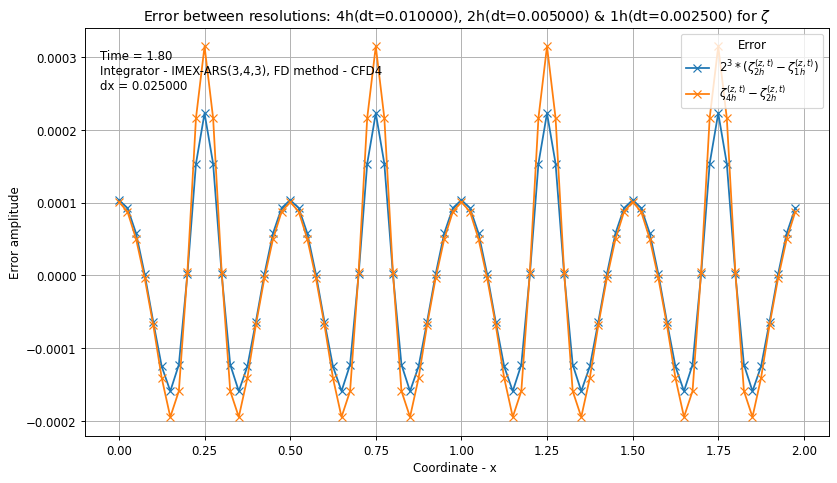

2.0000000000000004 2.0000000000000004 2.0000000000000004


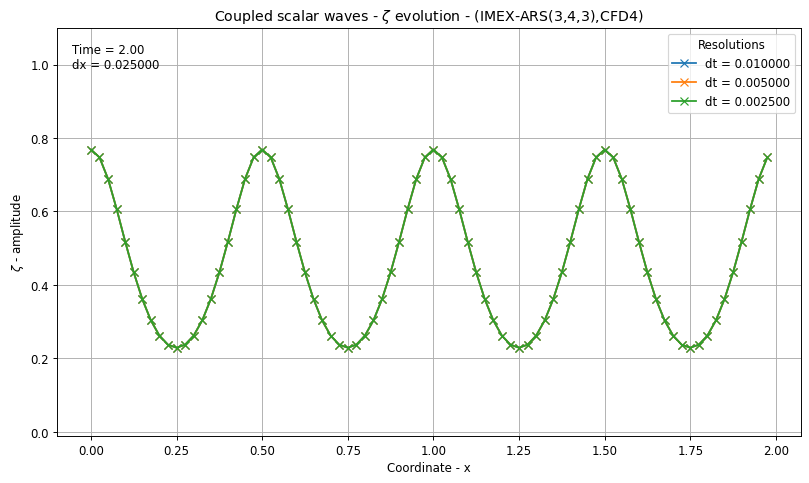

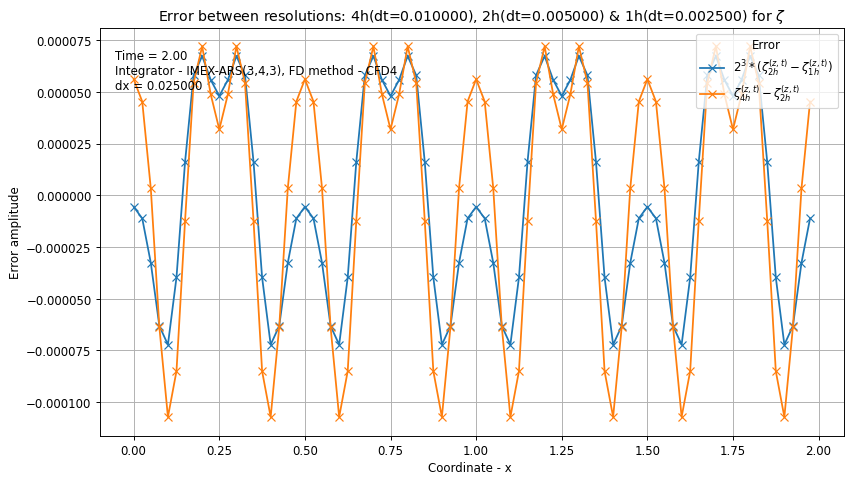

In [34]:
#Plot wave function at sampled time and position

def plots(title,x_label,y_label,x_param,y_param,time):
    fig_dpi = 85
    fig, ax = plt.subplots(figsize=(960/fig_dpi,540/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    plt.ylim(-0.01,1.1)
    plt.plot(x_param,y_param,"-x")
    plt.grid(axis="both")
    plt.legend(["dt = %.6f"%dt_4h,"dt = %.6f"%dt_2h,"dt = %.6f"%dt_1h],
               title="Resolutions",loc='upper right')
    plt.text(0.02, 0.90, 'Time = %.2f \ndx = %.6f'%(time,dx),
             transform=ax.transAxes,fontsize=10)
    plt.show()

if (time_integration_method == "IMEX-ARS(3,4,3)"):
    p_phi = 4
    p_zeta = 3
else:
    p_phi = 4
    p_zeta = 4

def plot_error(title,x_label,y_label,legend_info,x_param,y_param1,y_param2,time):
    fig_dpi = 85
    fig, ax = plt.subplots(figsize=(960/fig_dpi,540/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    #plt.xlim(0.3,1.7)
    #plt.ylim(-1E-4,+1E-4)
    plt.text(0.02, 0.85, 'Time = %.2f \nIntegrator - %s, FD method - %s \ndx = %.6f'%(time,time_integration_method,finite_difference_method,dx),
             transform=ax.transAxes,fontsize=10)
    plt.plot(x_param,y_param1,'-x')
    plt.plot(x_param,y_param2,'-x')
    plt.grid(axis="both")
    plt.legend(legend_info,title="Error",loc='upper right')
    plt.show()

#Highest resolution: 1h, lowest resolution = 4h
plots_to_generate = 10

for i in range (0,Nt_4h,int(Nt_4h/plots_to_generate)):
    if (i>=0):
        print(var_t_4h[i],var_t_2h[i*2],var_t_1h[i*4])
        plots(r'Coupled scalar waves - $\phi$ evolution - (%s,%s)'%(time_integration_method,finite_difference_method),
          "Coordinate - x",r'$\phi$ - amplitude',
          var_x_4h,
          np.transpose([phi_4h[i],phi_2h[i*2],phi_1h[i*4]]),
          var_t_4h[i])
        plot_error(r"Error between resolutions: 4h(dt=%.6f), 2h(dt=%.6f) & 1h(dt=%.6f) for $\phi$"%(dt_4h,dt_2h,dt_1h),
               "Coordinate - x ","Error amplitude",
               [r"$2^{%d}*(\phi^{(z,t)}_{2h}-\phi^{(z,t)}_{1h})$"%p_phi,
                r"$\phi^{(z,t)}_{4h}-\phi^{(z,t)}_{2h}$"],
               var_x_1h,
               (2**p_phi)*(phi_2h[i*2] - phi_1h[i*4]),
               (phi_4h[i] - phi_2h[i*2]),
               var_t_4h[i])

for i in range (0,Nt_4h,int(Nt_4h/plots_to_generate)):
    if (i>=0):
        print(var_t_4h[i],var_t_2h[i*2],var_t_1h[i*4])
        plots(r'Coupled scalar waves - $\zeta$ evolution - (%s,%s)'%(time_integration_method,finite_difference_method),
          "Coordinate - x",r'$\zeta$ - amplitude',
          var_x_4h,
          np.transpose([zeta_4h[i],zeta_2h[i*2],zeta_1h[i*4]]),
          var_t_4h[i])
        plot_error(r"Error between resolutions: 4h(dt=%.6f), 2h(dt=%.6f) & 1h(dt=%.6f) for $\zeta$"%(dt_4h,dt_2h,dt_1h),
               "Coordinate - x ","Error amplitude",
               [r"$2^{%d}*(\zeta^{(z,t)}_{2h}-\zeta^{(z,t)}_{1h})$"%p_zeta,
                r"$\zeta^{(z,t)}_{4h}-\zeta^{(z,t)}_{2h}$"],
               var_x_2h,
               (2**p_zeta)*(zeta_2h[i*2] - zeta_1h[i*4]),
               (zeta_4h[i] - zeta_2h[i*2]),
               var_t_4h[i])  
